### EXPLORATORY DATA ANALYSIS ON PENGUIN DATASET

### Introduction
The dataset in use is penguin dataset: the new iris. The dataset is originally published by [Dr.Kristen Gorman](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081). 
This dataset contains penguin species and culmen and flipper measurements, body mass, sex and islands they are found at.
The data used is in the file `penguins_size.csv` found on [Kaggle](https://www.kaggle.com/parulpandey/penguin-dataset-the-new-iris/data?select=penguins_size.csv)

### Summary

`penguins_size.csv`: Simplified data from original penguin data sets. Contains variables:

- `species`: penguin species (Chinstrap, Adélie, or Gentoo)
- `culmen_length_mm`: culmen length (mm)
- `culmen_depth_mm`: culmen depth (mm)
- `flipper_length_mm`: flipper length (mm)
- `body_mass_g`: body mass (g)
- `island`: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
- `sex`: penguin sex (Male, Female)

##### Initial Plans:
- **retrieve data**
- **analyse**: shape, columns, groupby, visualise
- **data cleaning**: remove null, check for skew, transform, scale
- **visualise**
- **hypothesis testing**: Significance test

### Data Retrieving and Analysis

In [118]:
import os
import numpy as np
import pandas as pd

In [119]:
filepath = "data/penguins_size.csv"
data = pd.read_csv(filepath)
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [122]:
data.shape


(344, 7)

In [123]:
data.drop(["island"], axis=1, inplace=True)

In [124]:
data.columns.tolist()

['species',
 'culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

array([[<AxesSubplot:title={'center':'culmen_length_mm'}>,
        <AxesSubplot:title={'center':'culmen_depth_mm'}>],
       [<AxesSubplot:title={'center':'flipper_length_mm'}>,
        <AxesSubplot:title={'center':'body_mass_g'}>]], dtype=object)

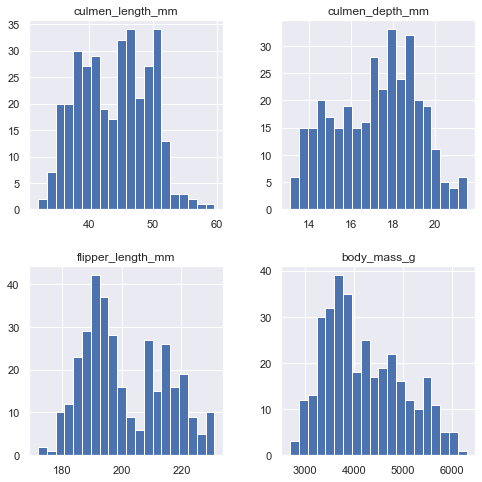

In [125]:
data.hist(bins=20, figsize=(8, 8))

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

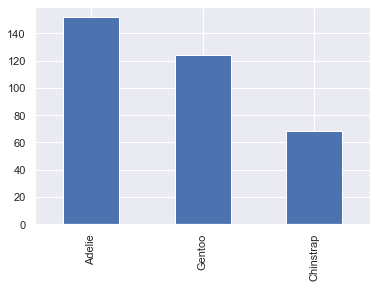

In [126]:
data["species"].value_counts().plot(kind="bar")
data["species"].value_counts()

In [128]:
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
stats_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000
range,27.500000,8.400000,59.000000,3600.000000


In [129]:
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields] 
stats_df.rename({'50%': 'median'}, inplace=True) #renaming 50% to median
stats_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
mean,43.92193,17.15117,200.915205,4201.754386
25%,39.22500,15.60000,190.000000,3550.000000
median,44.45000,17.30000,197.000000,4050.000000
75%,48.50000,18.70000,213.000000,4750.000000
range,27.50000,8.40000,59.000000,3600.000000


calculating for each species in a seperate dataframe.

In [130]:
data.groupby('species').mean()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.504878,14.982114,217.186992,5076.016260


In [131]:
data.groupby('species').agg([np.mean, np.median]) 

culmen_length_mm        culmen_depth_mm        flipper_length_mm  \
                      mean median            mean median              mean   
species                                                                      
Adelie           38.791391  38.80       18.346358  18.40        189.953642   
Chinstrap        48.833824  49.55       18.420588  18.45        195.823529   
Gentoo           47.504878  47.30       14.982114  15.00        217.186992   

                  body_mass_g          
          median         mean  median  
species                                
Adelie     190.0  3700.662252  3700.0  
Chinstrap  196.0  3733.088235  3700.0  
Gentoo     216.0  5076.016260  5000.0

Making a `scatter plot` for `culmen_length` vs `culmen_depth`

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline

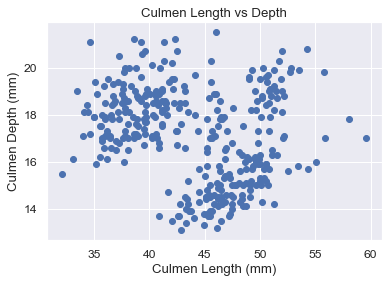

In [164]:
ax = plt.axes()

ax.scatter(data.culmen_length_mm, data.culmen_depth_mm)

# Label the axes
ax.set(xlabel='Culmen Length (mm)',
       ylabel='Culmen Depth (mm)',
       title='Culmen Length vs Depth');

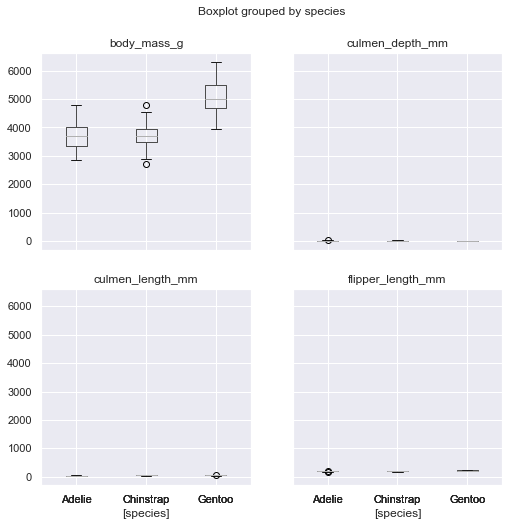

In [134]:
data.boxplot(by='species', figsize=(8,8));

### Data Cleaning

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   culmen_length_mm   342 non-null    float64
 2   culmen_depth_mm    342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
 5   sex                334 non-null    object 
dtypes: float64(4), object(2)
memory usage: 16.2+ KB


In [136]:
df = data.copy()

In [137]:
one_hot_encode_cols = data.dtypes[df.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

df[one_hot_encode_cols].head().T

,0,1,2,3,4
species,Adelie,Adelie,Adelie,Adelie,Adelie
sex,MALE,FEMALE,FEMALE,NaN,FEMALE


In [138]:
df.isnull().sum()

species               0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

- There are a *lot* of null values. 
- For numercial columns replacing by mean 
- For categorical columns replacing by mode.

In [139]:
for i in df.columns:
    if(df[i].isnull()).any():
        if(df[i].dtype) == 'float64':
            df[i] = df[i].replace(np.nan, df[i].mean())
        if(df[i].dtype) == 'object':
            df[i] = df[i].replace(np.nan, df[i].mode()[0]) 

In [140]:
df['sex'] = df['sex'].replace('.','MALE')

In [141]:
df.isnull().sum()

species              0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

#### PairPlot for numerical columns


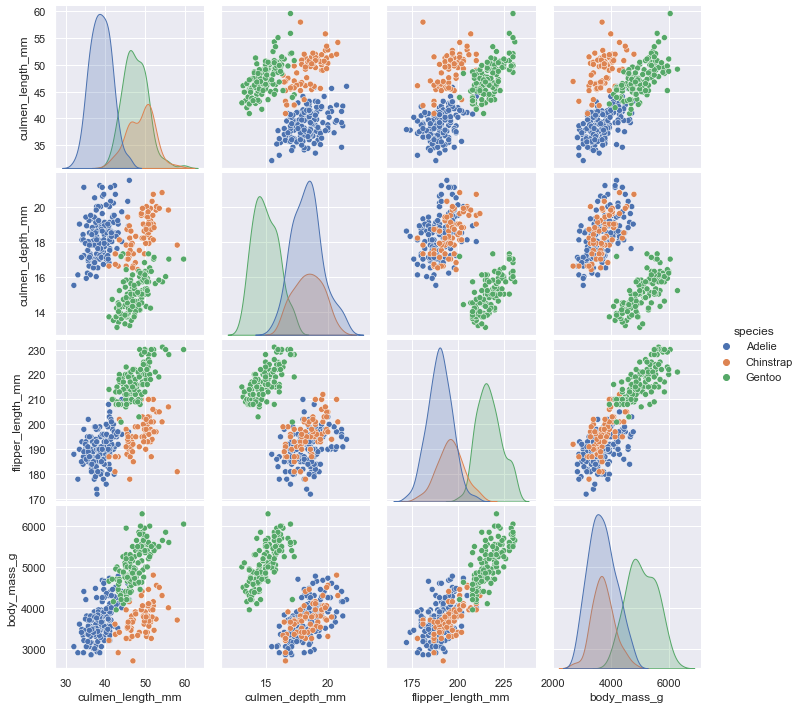

In [143]:
sns.pairplot(df, hue= 'species')

- PairPlots for categorical columns

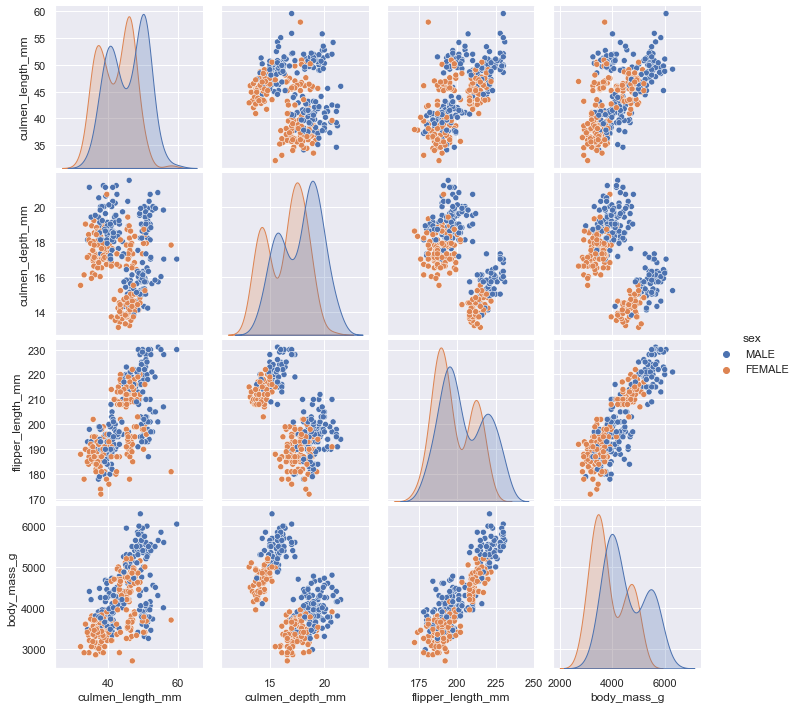

In [144]:
sns.pairplot(df, hue= 'sex')

Converting sex column to integer value by Label Encoder, Nominal to Numeric value conversion

In [145]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df["sex"] = lb.fit_transform(df["sex"])

In [146]:
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.10000,18.70000,181.000000,3750.000000,1
1,Adelie,39.50000,17.40000,186.000000,3800.000000,0
2,Adelie,40.30000,18.00000,195.000000,3250.000000,0
3,Adelie,43.92193,17.15117,200.915205,4201.754386,1
4,Adelie,36.70000,19.30000,193.000000,3450.000000,0


#### Analysing the data visually.

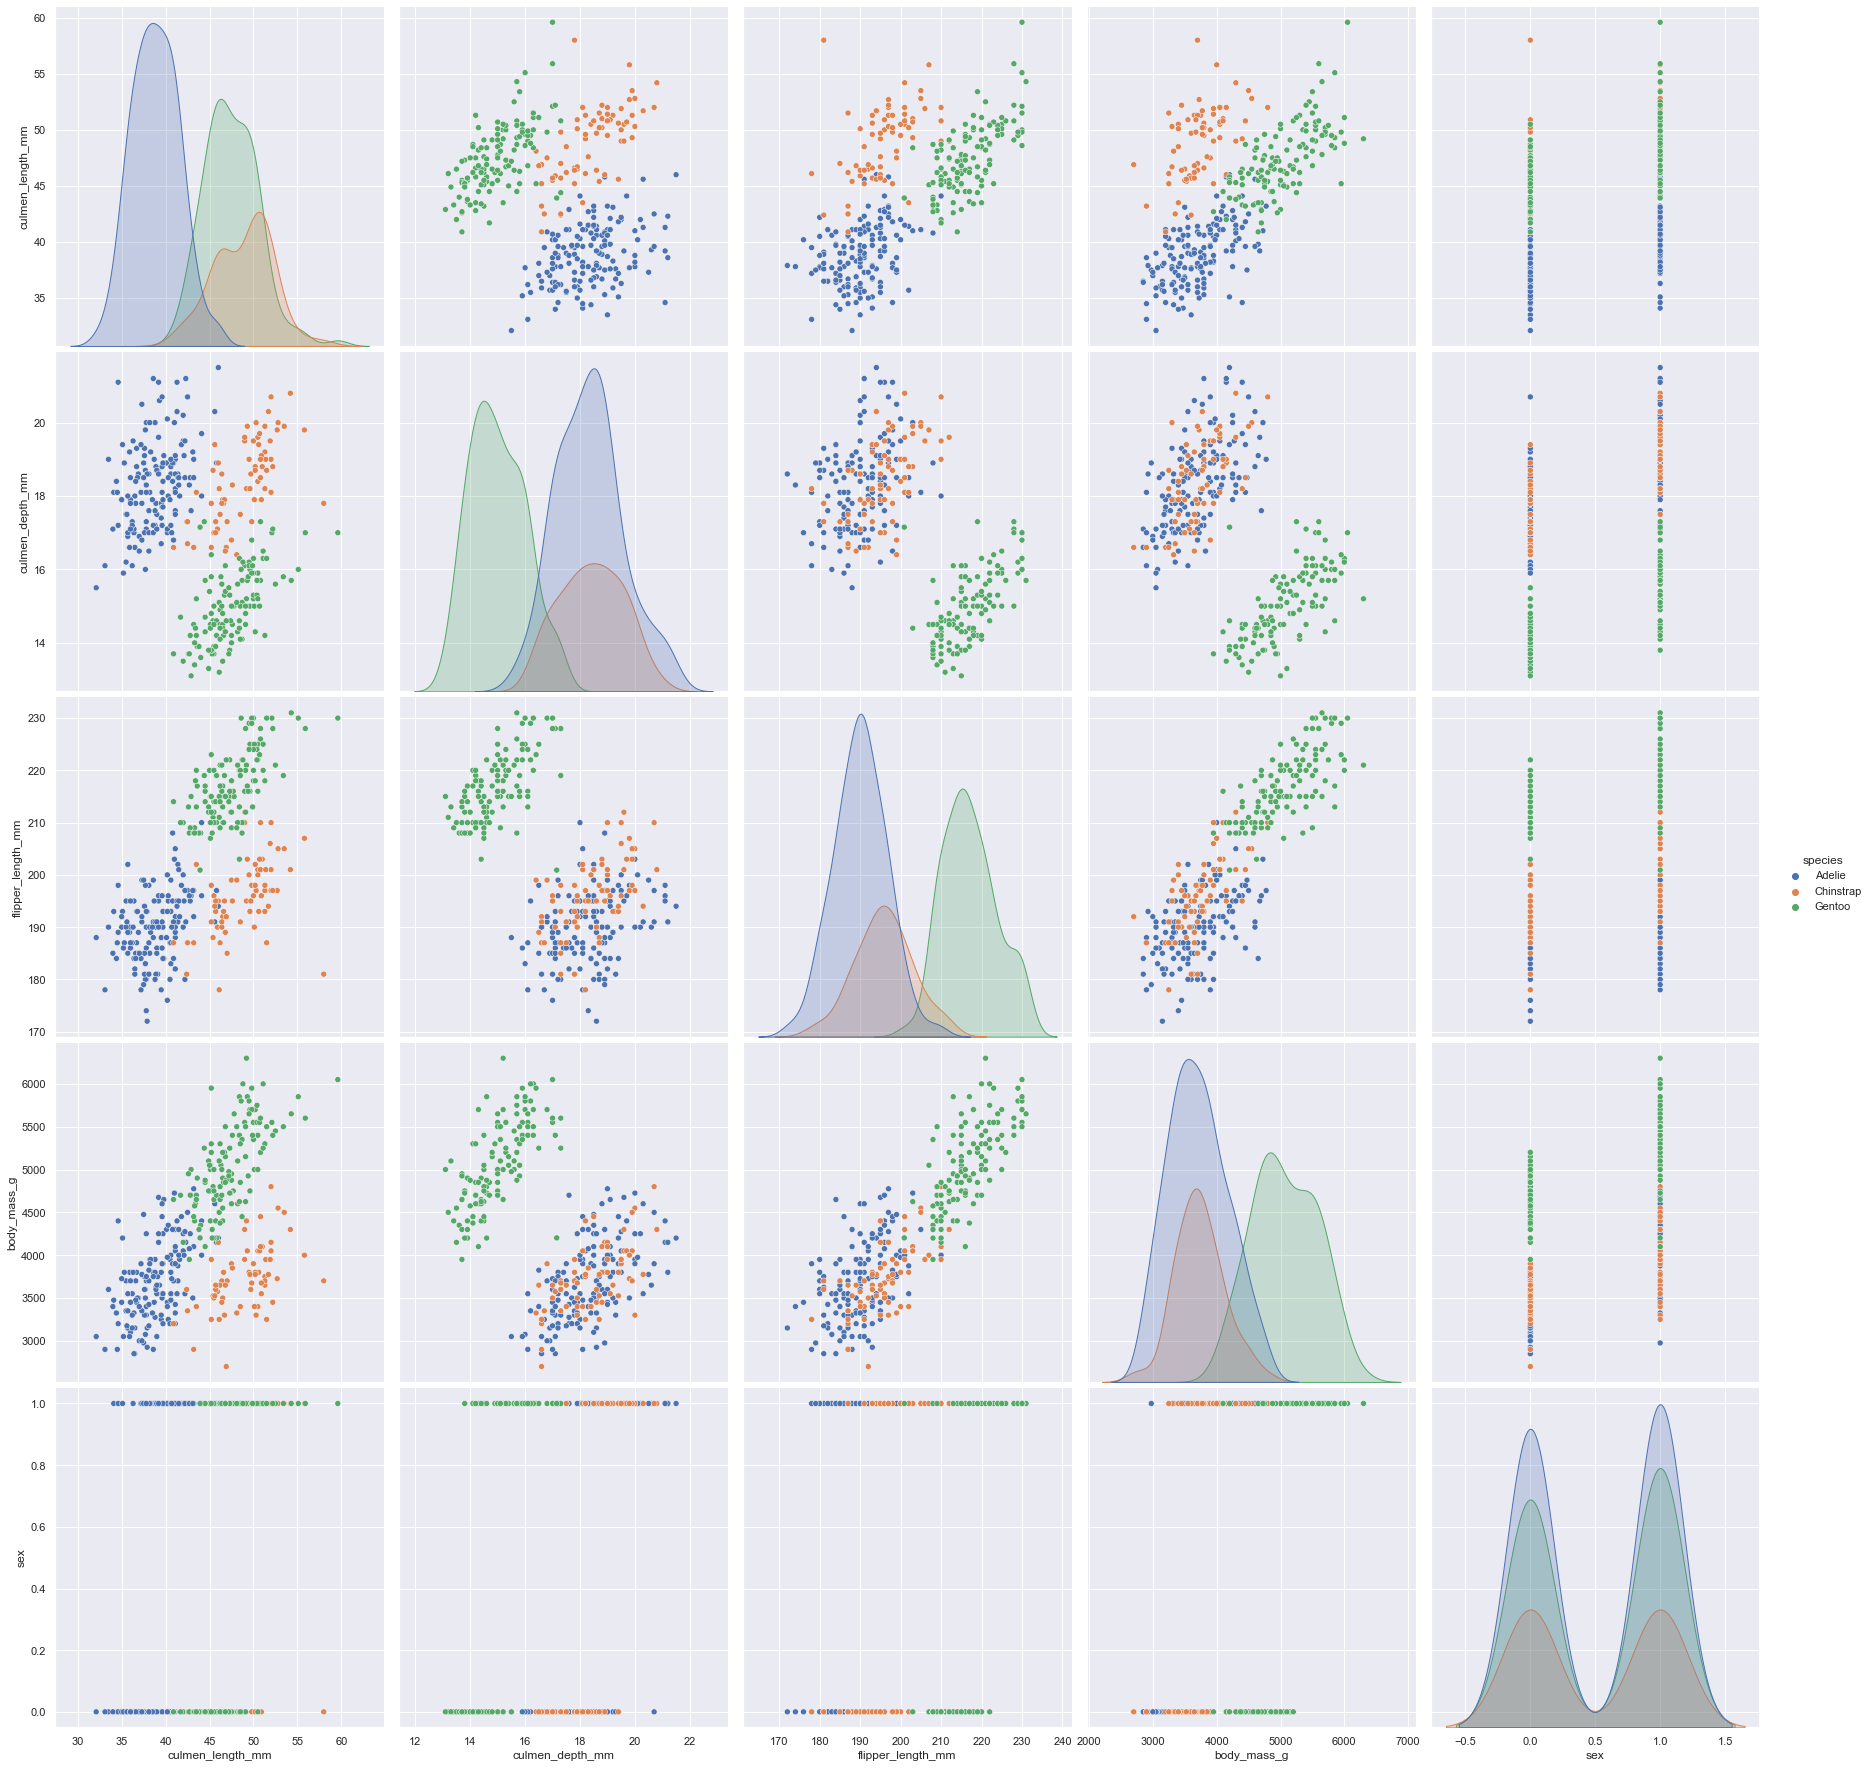

In [147]:
sns.pairplot(df, hue = 'species', height=5)

##### *observation*
From above plot we can see that,

- In case of culmen length, Adelie is easily identifiable.
- In case of culmen depth, flipper length and body mass, Gentoo is easily identifiable.
- In all cases, Chinstrap remains hard to identify.

#### 1. Scatter Plot for `culmen_depth` vs `culmen_length`

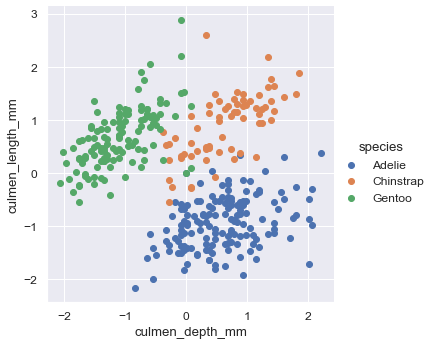

In [158]:
sns.FacetGrid(df, hue="species", height=5) \
   .map(plt.scatter, "culmen_depth_mm", "culmen_length_mm") \
   .add_legend()

#### 2. Scatter Plot for `culmen_depth` vs `Flipper_length`

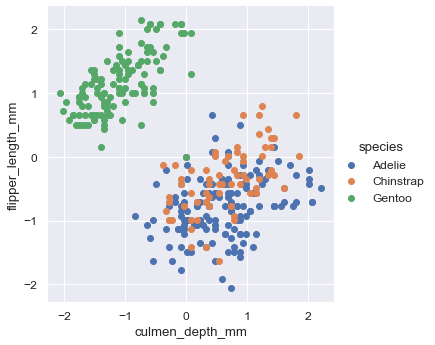

In [159]:
sns.FacetGrid(df, hue="species", height=5) \
   .map(plt.scatter, "culmen_depth_mm", "flipper_length_mm") \
   .add_legend()

#### 3. Scatter Plot for `Flipper_Length` vs `body_mass`

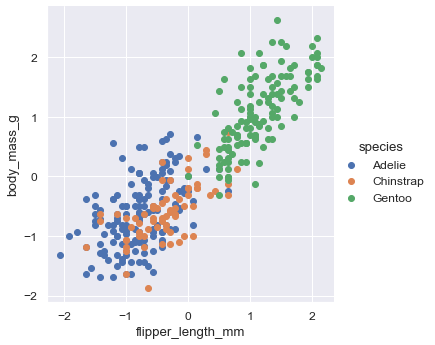

In [160]:
sns.set_context("notebook", font_scale=1.1)
sns.FacetGrid(df, hue="species", height=5) \
   .map(plt.scatter,"flipper_length_mm", "body_mass_g") \
   .add_legend()

### Covariance and Correlation

- Covariance

In [151]:
df.cov()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
culmen_length_mm,29.633252,-2.519457,50.082029,2590.398957,0.877896
culmen_depth_mm,-2.519457,3.877069,-16.118414,-743.012250,0.349105
flipper_length_mm,50.082029,-16.118414,196.578837,9767.130837,1.708480
body_mass_g,2590.398957,-743.012250,9767.130837,639381.041890,163.307503
sex,0.877896,0.349105,1.708480,163.307503,0.250314


- Correlation


In [152]:
df.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110,0.322338
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916,0.354374
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202,0.243556
body_mass_g,0.595110,-0.471916,0.871202,1.000000,0.408210
sex,0.322338,0.354374,0.243556,0.408210,1.000000


<AxesSubplot:>

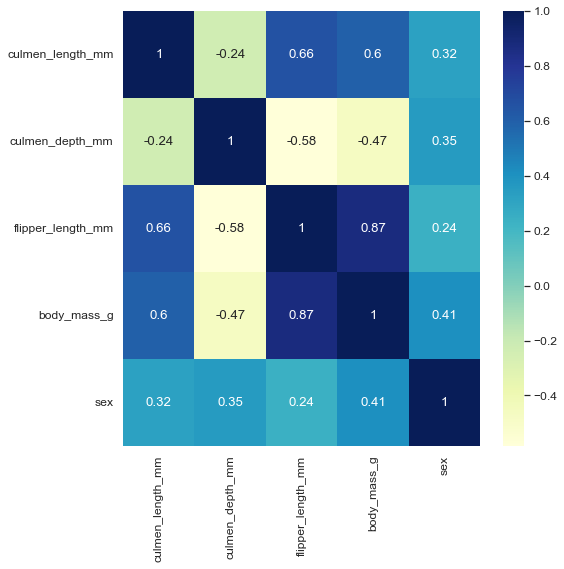

In [153]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

##### *Observations*
from the above heatmap we can determine the following:
- The flipper length is highly correlated to body mass with a value of `0.87` <br>
*conclusion*: The heavier penguins have longer flippers.

#### Outliers Detection

- plotting the Box Plot.

<AxesSubplot:>

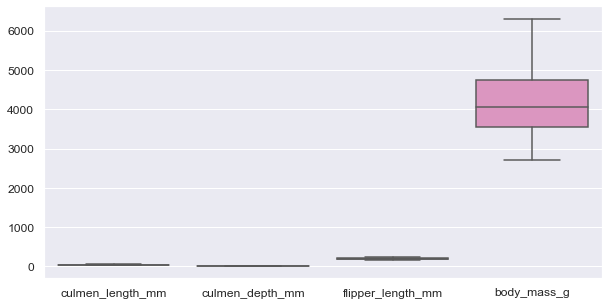

In [154]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df.drop(['sex'], axis = 1), palette = "Set2")

- Scaling data for handling outliers

In [155]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [156]:
for i in df.columns:
    if df[i].dtype == 'float64':
        a = np.asarray(df[i])
        a = a.reshape(-1, 1) 
        df[i] = sc.fit_transform(a)

<AxesSubplot:>

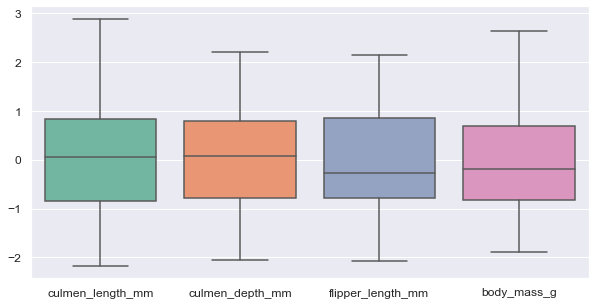

In [157]:
plt.figure(figsize=(10,5))
sns.boxplot(data = df.drop(['sex'], axis = 1), palette = "Set2")

#### Hypothesis testing
- Hypothesis 1
    - Null Hypothesis: Penguins body mass is dependent on flipper length.
    - Alternate Hypothesis: Both these are independent of each other.

#### key Findings
- In case of culmen length, Adelie is easily identifiable.
- In case of culmen depth, flipper length and body mass, Gentoo is easily identifiable.
- In all cases, Chinstrap remains hard to identify.
- The heavier penguins have longer flippers.

#### Steps Summarised:
- Data was cleaned for missing values by one_hot_encoding method and filling with mean and mode values for numeric and categorical columns respectively. 
- There was no significant deviation but there were a few outliers which were handled *after* standard Scaling. 
- One coloumn was dropped as it was outside the scope of this study that was performed. 
- One of the categorical column was Encoded to yeild numeric value by label encoding method.
- One significant Correlation was found as observed in heat map.
- Each of the above step is accompanied by visual plots and their observations respectively.

#### Data Summary
The given dataset is clean with minimal skewness and insignificant outliers. Can be used further for training the machine. 
